### Kaggle ID: Jose Fernandez

In [49]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
import random
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

### Problem 6: Isocontours of Normal Distributions
#### With help from: https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/ for subparts below

#### Problem 6.1

In [2]:
precision = 60
x1 = np.linspace(-4, 5, precision)
x2 = np.linspace(-4, 5, precision)
x1, x2 = np.meshgrid(x1, x2)
mu = np.array([1, 1])
sigma = np.array([[1, 0], [0, 2]])
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2

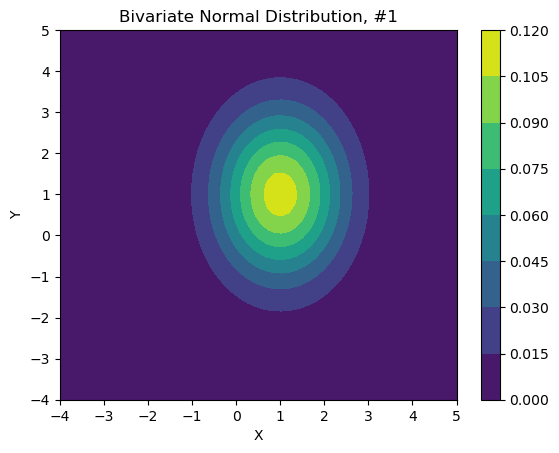

In [3]:
# Plots multivariate gaussian based on x, y, mu, and sigma.
def multivariate_gaussian(x, y, pos, mu, sigma):
    det = np.linalg.det(sigma)
    inverse = np.linalg.inv(sigma)
    denom = np.sqrt((2*np.pi)**2 * det)
    # Calculates -.5(x-mu)^T sigma^-1 (x-mu) automatically
    fac = (-.5)*np.einsum('...k,kl,...l->...', pos-mu, inverse, pos-mu)
    z = np.exp(fac) / denom
    fig = plt.contourf(x, y, z)
    plt.colorbar(fig)
    plt.title('Bivariate Normal Distribution, #1')
    plt.xlabel("X")
    plt.ylabel("Y")
multivariate_gaussian(x1, x2, pos, mu, sigma)

#### Problem 6.2

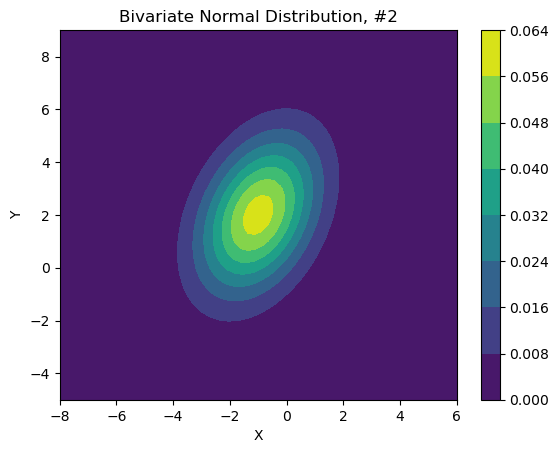

In [4]:
precision = 60
mu = np.array([-1, 2])
sigma = np.array([[2, 1], [1, 4]])
x1 = np.linspace(mu[0] - 7, mu[0] + 7, precision)
x2 = np.linspace(mu[1] - 7, mu[1] + 7, precision)
x1, x2 = np.meshgrid(x1, x2)
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2

# Plots multivariate gaussian based on x, y, mu, and sigma.
def multivariate_gaussian(x, y, pos, mu, sigma):
    det = np.linalg.det(sigma)
    inverse = np.linalg.inv(sigma)
    denom = np.sqrt((2*np.pi)**2 * det)
    # Calculates -.5(x-mu)^T sigma^-1 (x-mu) automatically
    fac = (-.5)*np.einsum('...k,kl,...l->...', pos-mu, inverse, pos-mu)
    z = np.exp(fac) / denom
    fig = plt.contourf(x, y, z)
    plt.colorbar(fig)
    plt.title('Bivariate Normal Distribution, #2')
    plt.xlabel("X")
    plt.ylabel("Y")
multivariate_gaussian(x1, x2, pos, mu, sigma)

#### Problem 6.3

Text(0, 0.5, 'Y')

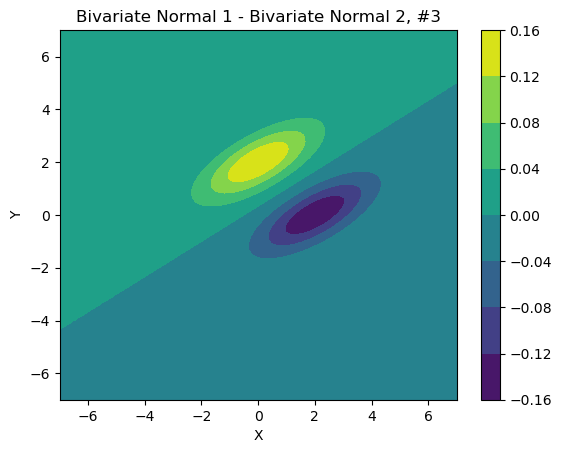

In [5]:
precision = 100
mu = np.array([0, 2])
sigma = np.array([[2, 1], [1, 1]])
x1 = np.linspace(-7, 7, precision)
x2 = np.linspace(-7, 7, precision)
x1, x2 = np.meshgrid(x1, x2)
mu2 = np.array([2, 0])
x3 = np.linspace(-7, 7, precision)
x4 = np.linspace(-7, 7, precision)
x3, x4 = np.meshgrid(x3, x4)
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2
pos2 = np.empty(x3.shape + (2,))
pos2[:, :, 0] = x3
pos2[:, :, 1] = x4

# Plots multivariate gaussian based on x, y, mu, and sigma.
def multivariate_gaussian(x, y, pos, mu, sigma):
    det = np.linalg.det(sigma)
    inverse = np.linalg.inv(sigma)
    denom = np.sqrt((2*np.pi)**2 * det)
    # Calculates -.5(x-mu)^T sigma^-1 (x-mu) automatically
    fac = (-.5)*np.einsum('...k,kl,...l->...', pos-mu, inverse, pos-mu)
    return np.array(np.exp(fac) / denom)
Z1 = multivariate_gaussian(x1, x2, pos, mu, sigma)
Z2 = multivariate_gaussian(x3, x4, pos2, mu2, sigma)
Z = Z1 - Z2
fig = plt.contourf(x1, x2, Z)
plt.colorbar(fig)
plt.title('Bivariate Normal 1 - Bivariate Normal 2, #3')
plt.xlabel("X")
plt.ylabel("Y")

#### Problem 6.4

Text(0, 0.5, 'Y')

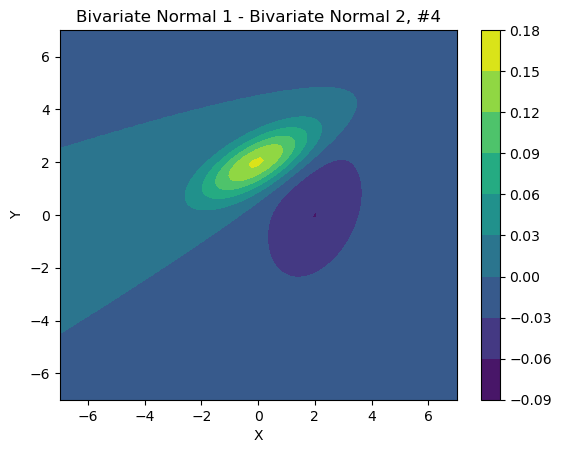

In [6]:
precision = 100
mu = np.array([0, 2])
sigma = np.array([[2, 1], [1, 1]])
x1 = np.linspace(-7, 7, precision)
x2 = np.linspace(-7, 7, precision)
x1, x2 = np.meshgrid(x1, x2)
mu2 = np.array([2, 0])
sigma2 = np.array([[2, 1], [1, 4]])
x3 = np.linspace(-7, 7, precision)
x4 = np.linspace(-7, 7, precision)
x3, x4 = np.meshgrid(x3, x4)
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2
pos2 = np.empty(x3.shape + (2,))
pos2[:, :, 0] = x3
pos2[:, :, 1] = x4

# Plots multivariate gaussian based on x, y, mu, and sigma.
def multivariate_gaussian(x, y, pos, mu, sigma):
    det = np.linalg.det(sigma)
    inverse = np.linalg.inv(sigma)
    denom = np.sqrt((2*np.pi)**2 * det)
    # Calculates -.5(x-mu)^T sigma^-1 (x-mu) automatically
    fac = (-.5)*np.einsum('...k,kl,...l->...', pos-mu, inverse, pos-mu)
    return np.array(np.exp(fac) / denom)
Z1 = multivariate_gaussian(x1, x2, pos, mu, sigma)
Z2 = multivariate_gaussian(x3, x4, pos2, mu2, sigma2)
Z = Z1 - Z2
fig = plt.contourf(x1, x2, Z)
plt.colorbar(fig)
plt.title('Bivariate Normal 1 - Bivariate Normal 2, #4')
plt.xlabel("X")
plt.ylabel("Y")

#### Problem 6.5

Text(0, 0.5, 'Y')

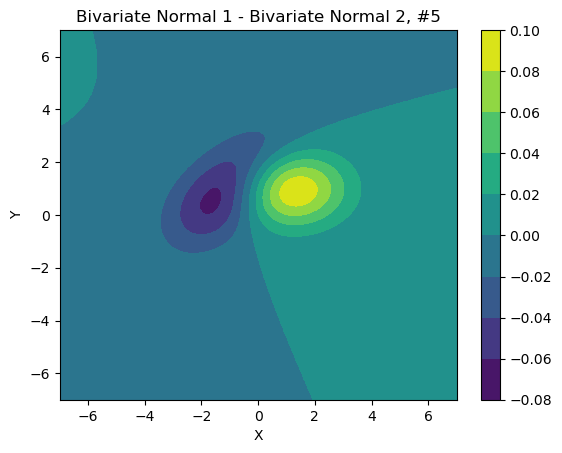

In [7]:
precision = 100
mu = np.array([1, 1])
sigma = np.array([[2, 0], [0, 1]])
x1 = np.linspace(-7, 7, precision)
x2 = np.linspace(-7, 7, precision)
x1, x2 = np.meshgrid(x1, x2)
mu2 = np.array([-1, 1])
sigma2 = np.array([[2, 1], [1, 2]])
x3 = np.linspace(-7, 7, precision)
x4 = np.linspace(-7, 7, precision)
x3, x4 = np.meshgrid(x3, x4)
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2
pos2 = np.empty(x3.shape + (2,))
pos2[:, :, 0] = x3
pos2[:, :, 1] = x4

# Plots multivariate gaussian based on x, y, mu, and sigma.
def multivariate_gaussian(x, y, pos, mu, sigma):
    det = np.linalg.det(sigma)
    inverse = np.linalg.inv(sigma)
    denom = np.sqrt((2*np.pi)**2 * det)
# Calculates -.5(x-mu)^T sigma^-1 (x-mu) automatically
    fac = (-.5)*np.einsum('...k,kl,...l->...', pos-mu, inverse, pos-mu)
    return np.array(np.exp(fac) / denom)

Z1 = multivariate_gaussian(x1, x2, pos, mu, sigma)
Z2 = multivariate_gaussian(x3, x4, pos2, mu2, sigma2)
Z = Z1 - Z2
fig = plt.contourf(x1, x2, Z)
plt.colorbar(fig)
plt.title('Bivariate Normal 1 - Bivariate Normal 2, #5')
plt.xlabel("X")
plt.ylabel("Y")

### Problem 7: Eigenvectors of the Gaussian Covariance Matrix

In [8]:
np.random.seed(1234)
x1 = np.random.normal(3, 3, 100)
x2 = .5*x1 + np.random.normal(4, 2, 100)
X = np.array([(x1[i], x2[i]) for i in range(len(x1))])
print(X[:5])

[[ 4.41430549  6.78956347]
 [-0.57292708  4.84660385]
 [ 7.29812091  8.65624397]
 [ 2.06204431  5.60161353]
 [ 0.8382338   5.38769313]]


#### Problem 7.1

In [9]:
mean_X = (np.mean(x1), np.mean(x2))
mean_X

(3.10533684937631, 5.452360178424956)

#### Problem 7.2

In [10]:
covariance = np.cov(X.T)
print(covariance)

[[9.0126211  4.99548251]
 [4.99548251 6.61132464]]


#### Problem 7.3

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(covariance)
print(eigenvalues)
print(eigenvectors)

[12.94971573  2.67423001]
[[ 0.78539537 -0.61899444]
 [ 0.61899444  0.78539537]]


#### Problem 7.4

Text(0.5, 1.0, 'Sample points and their eigenvectors')

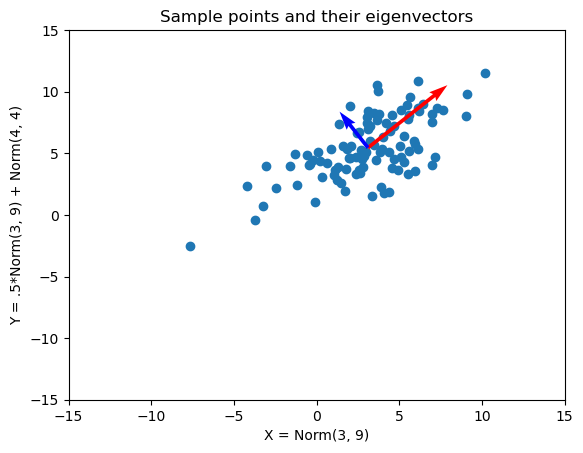

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
mean_X2 = np.array([mean_X]).T
plt.scatter(x1, x2)
plt.xlabel("X = Norm(3, 9)")
plt.ylabel("Y = .5*Norm(3, 9) + Norm(4, 4)")
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.quiver(*mean_X2, eigenvectors.T[0,0], eigenvectors.T[0,1], color=['r','b'], scale = 3*np.sqrt(eigenvalues[1])),
plt.quiver(*mean_X2, eigenvectors.T[1,0], eigenvectors.T[1,1], color=['b'], scale = 3*np.sqrt(eigenvalues[0]))
plt.title("Sample points and their eigenvectors")

#### Problem 7.5

Text(0.5, 1.0, 'Sample Points After a Rotation')

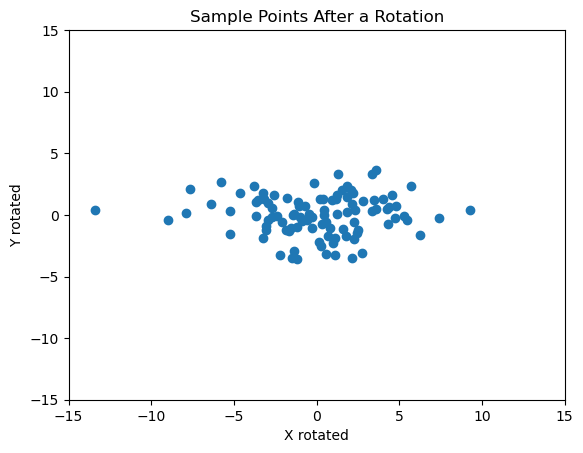

In [13]:
U_t = eigenvectors.copy().T
X_rotated = (X - mean_X).T
X_rotated = np.matmul(U_t, X_rotated).T
plt.scatter(X_rotated[:, 0], X_rotated[:, 1])
plt.xlabel("X rotated")
plt.ylabel("Y rotated")
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.title("Sample Points After a Rotation")

### Problem 8: Gaussian Classifiers for Digits and Spam

In [14]:
if __name__ == "__main__":
    for data_name in ["mnist", "spam"]:
        data = np.load(f"/Users/jose/Downloads/hw3/data/{data_name}-data-hw3.npz")  
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)
        if data_name == "mnist":
            mnist_training_data = data["training_data"]
            mnist_test_data = data["test_data"]
            mnist_training_labels = data["training_labels"]
        if data_name == "spam":
            spam_training_data = data["training_data"]
            spam_test_data = data["test_data"]
            spam_training_labels = data["training_labels"]



loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4171, 32)
training_labels (4171,)


#### Problem 8.1 

In [15]:
for i in range(len(mnist_training_data)):
    mnist_training_data[i] = mnist_training_data[i] / np.linalg.norm(mnist_training_data[i])
for i in range(len(mnist_test_data)):
    mnist_test_data[i] = mnist_test_data[i] / np.linalg.norm(mnist_test_data[i])

In [16]:
mnist_training_data = np.squeeze(mnist_training_data)
mnist_test_data = np.squeeze(mnist_test_data)
mnist_training_data.shape


(60000, 28, 28)

In [ ]:
all_means = []
all_cov = []

for i in range(2):
    all_digit = mnist_training_data[mnist_training_labels == i]
    mean1 = np.mean(all_digit, axis=0)
    mean2 = np.concatenate(mean1)
    all_means.append(mean1)
    
    cov_array = []
    for num in all_digit:
        num = np.concatenate(num)
        cov = np.outer((num-mean2), (num-mean2))
        cov_array.append(cov)
        
    all_cov.append(np.mean(cov_array, axis=0))

In [ ]:
for i in range(2, 4):
    all_digit = mnist_train[mnist_train_labels == i]
    mean1 = np.mean(all_digit, axis=0)
    mean2 = np.concatenate(mean1)
    all_means.append(mean1)
    
    cov_array = []
    for num in all_digit:
        num = np.concatenate(num)
        cov = np.outer((num-mean2), (num-mean2))
        cov_array.append(cov)
        
    all_cov.append(np.mean(cov_array, axis=0))

In [ ]:
for i in range(4, 6):
    all_digit = mnist_train[mnist_train_labels == i]
    mean1 = np.mean(all_digit, axis=0)
    mean2 = np.concatenate(mean1)
    all_means.append(mean1)
    
    cov_array = []
    for num in all_digit:
        num = np.concatenate(num)
        cov = np.outer((num-mean2), (num-mean2))
        cov_array.append(cov)
        
    all_cov.append(np.mean(cov_array, axis=0))

In [ ]:
for i in range(6, 8):
    all_digit = mnist_train[mnist_train_labels == i]
    mean1 = np.mean(all_digit, axis=0)
    mean2 = np.concatenate(mean1)
    all_means.append(mean1)
    
    cov_array = []
    for num in all_digit:
        num = np.concatenate(num)
        cov = np.outer((num-mean2), (num-mean2))
        cov_array.append(cov)
        
    all_cov.append(np.mean(cov_array, axis=0))

In [ ]:
for i in range(8, 10):
    all_digit = mnist_train[mnist_train_labels == i]
    mean1 = np.mean(all_digit, axis=0)
    mean2 = np.concatenate(mean1)
    all_means.append(mean1)
    
    cov_array = []
    for num in all_digit:
        num = np.concatenate(num)
        cov = np.outer((num-mean2), (num-mean2))
        cov_array.append(cov)
        
    all_cov.append(np.mean(cov_array, axis=0))

In [ ]:
np.array(all_means).shape, np.array(all_cov).shape

#### Problem 8.2

In [ ]:
plt.imshow(all_means[9])
plt.title("Mean Matrix")

In [ ]:
plt.imshow(all_cov[9])
plt.title("Covariance Matrix of Digit 9")

#### The diagonal terms represent the variances of each pixel from all images. The non diagonal terms represent the covariance between pairs of pixels. This would suggest that stronger pixel densities correlate to higher variances between pixels and thus creating an image of the number.

#### Problem 8.3

In [27]:
import scipy
import sklearn

In [28]:
# This function takes in:
#     Training data,
#     Training labels,
#     Num of training points

# This function returns:
#     The covariance matrix,
#     The mean vector for 10 classes,
#     The labels of our training points

def create_parameters_lda(train, labels, train_points):
    all_means = []
    all_cov = []
    random_subset = random.sample(list(np.arange(len(train))), train_points)
    random_train, random_labels = np.array([train[i] for i in random_subset]), np.array([labels[i] for i in random_subset])

    for i in range(10):
        all_digit = random_train[random_labels == i]
        mean1 = np.mean(all_digit, axis=0)
        mean2 = np.concatenate(mean1)
        all_means.append(mean1)

    for num in random_train:
        num = np.concatenate(num)
        cov = np.outer((num-mean2), (num-mean2))
        all_cov.append(cov)

    
    for i in range(len(all_means)):
        all_means[i] = np.concatenate(all_means[i])
    
    return np.add(np.mean(all_cov, axis=0), .1 * np.identity(784)), np.array(all_means), random_labels

In [29]:
# This function takes in:
#     Training data,
#     Training labels,
#     Num of training points

# This function returns:
#     The covariance matrix for 10 classes,
#     The mean vector for 10 classes,
#     The labels of our training points

def create_parameters_qda(train, labels, train_points):
    all_means = []
    all_cov = []
    random_subset = random.sample(list(np.arange(len(train))), train_points)
    random_train, random_labels = np.array([train[i] for i in random_subset]), np.array([labels[i] for i in random_subset])

    for i in range(10):
        all_digit = random_train[random_labels == i]
        mean1 = np.mean(all_digit, axis=0)
        mean2 = np.concatenate(mean1)
        all_means.append(mean1)

        cov_array = []
        for num in all_digit:
            num = np.concatenate(num)
            cov = np.outer((num-mean2), (num-mean2))
            cov_array.append(cov)

        all_cov.append(np.add(np.mean(cov_array, axis=0), .1 * np.identity(784)))
        np.add(np.mean(all_cov, axis=0), .1 * np.identity(784))
    
    for i in range(len(all_means)):
        all_means[i] = np.concatenate(all_means[i])
    
    return np.array(all_cov), np.array(all_means), random_labels

In [30]:
# Predicts classes of each point based on:
#     Mean vectors,
#     Covariance matrix/Covariance matrices (if qda),
#     "lda" or "qda"

def predict(mean, covariance, points, mode):
    results = []
    points = np.array([np.concatenate(points[i]) for i in range(len(points))])
    if str.lower(mode) == "lda":
        for i in range(10):
            log_p = scipy.stats.multivariate_normal.logpdf(points, mean=mean[i], cov=covariance, allow_singular=True)
            results.append(log_p)
        predictions = np.argmax(results, axis=0)
        return predictions
    elif str.lower(mode) == "qda":
        for i in range(10):
            log_p = scipy.stats.multivariate_normal.logpdf(points, mean=mean[i], cov=covariance[i], allow_singular=True)
            results.append(log_p)
        predictions = np.argmax(results, axis=0)
        return predictions

In [31]:
# Create validation set of size 10000.
X_train, y_train, X_labels, y_labels = sklearn.model_selection.train_test_split(mnist_training_data, mnist_training_labels, test_size = 1/6)

In [32]:
# Create models using following sample points
# First we train the model (Get our parameters)
# Then we predict our 10000 validation values using the model
# After that, we calculate the error and append it to a list for plotting.
error_rate = []
for sample_pts in [100, 200, 500, 1000, 2000, 5000]:
    cov, mean, lmaoDontCare = create_parameters_lda(X_train, X_labels, sample_pts) 
    predictions = predict(mean, cov, y_train, "lda")
    error = 1 - sklearn.metrics.accuracy_score(predictions, y_labels)
    error_rate.append(error)
    print("Error for", str(sample_pts), ":", str(error))

Error for 100 : 0.9009
Error for 200 : 0.9009
Error for 500 : 0.9009
Error for 1000 : 0.9009
Error for 2000 : 0.9009
Error for 5000 : 0.9009


Text(0.5, 1.0, 'LDA Error Rate vs Model Training Size')

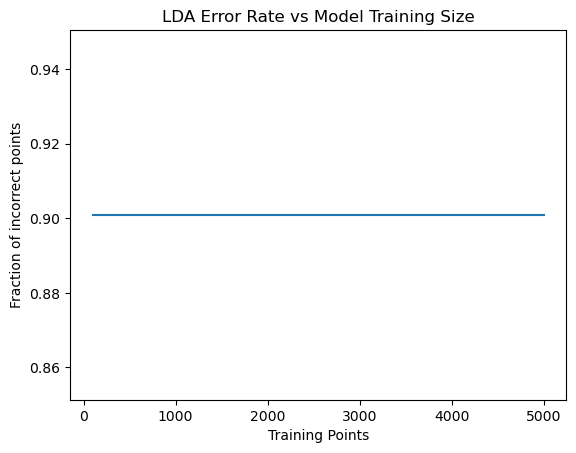

In [33]:
# Plotting our LDA error
plt.plot([100, 200, 500, 1000, 2000, 5000], error_rate)
plt.xlabel("Training Points")
plt.ylabel("Fraction of incorrect points")
plt.title("LDA Error Rate vs Model Training Size")

In [34]:
# Same process as before, except for QDA.
# Smaller sample sizes
error_rate_qda = []
for sample_pts in [100, 200, 500, 1000, 2000, 5000]:
    cov, mean, lmaoDontCare = create_parameters_qda(X_train, X_labels, sample_pts) 
    predictions = predict(mean, cov, y_train, "qda")
    error = 1 - sklearn.metrics.accuracy_score(predictions, y_labels)
    error_rate_qda.append(error)
    print("Error for", str(sample_pts), ":", str(error))

Error for 100 : 0.9009
Error for 200 : 0.9009
Error for 500 : 0.9009
Error for 1000 : 0.9009
Error for 2000 : 0.9009
Error for 5000 : 0.9009


Text(0.5, 1.0, 'QDA Error Rate vs Model Training Size')

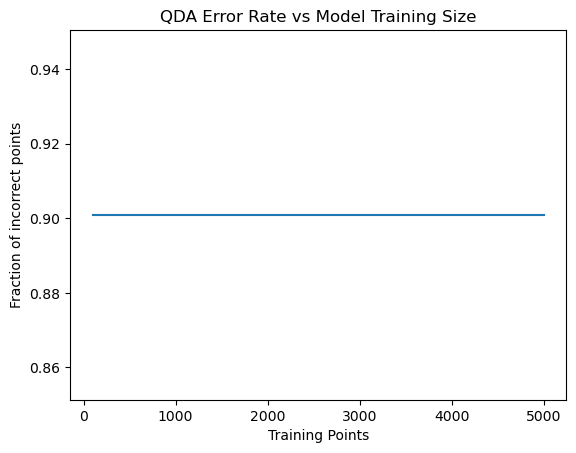

In [35]:
# Plotting our QDA error.
plt.plot([100, 200, 500, 1000, 2000, 5000], error_rate_qda)
plt.xlabel("Training Points")
plt.ylabel("Fraction of incorrect points")
plt.title("QDA Error Rate vs Model Training Size")

In [36]:
error_rate2 = []
for sample_pts in [100, 200, 500, 1000, 2000, 5000]:
    cov, mean, lmaoDontCare = create_parameters_lda(X_train, X_labels, sample_pts) 
    predictions = predict(mean, cov, y_train, "lda")
    err = []
    for i in range(10):
        error = 1 - sklearn.metrics.accuracy_score(predictions[y_labels == i], y_labels[y_labels == i])
        err.append(error)
        print("Size: ", str(sample_pts), ". Error for digit", str(i), ": ", err[i])
    error_rate2.append(np.array(err))
    print('')

Size:  100 . Error for digit 0 :  0.0
Size:  100 . Error for digit 1 :  1.0
Size:  100 . Error for digit 2 :  1.0
Size:  100 . Error for digit 3 :  1.0
Size:  100 . Error for digit 4 :  1.0
Size:  100 . Error for digit 5 :  1.0
Size:  100 . Error for digit 6 :  1.0
Size:  100 . Error for digit 7 :  1.0
Size:  100 . Error for digit 8 :  1.0
Size:  100 . Error for digit 9 :  1.0

Size:  200 . Error for digit 0 :  0.0
Size:  200 . Error for digit 1 :  1.0
Size:  200 . Error for digit 2 :  1.0
Size:  200 . Error for digit 3 :  1.0
Size:  200 . Error for digit 4 :  1.0
Size:  200 . Error for digit 5 :  1.0
Size:  200 . Error for digit 6 :  1.0
Size:  200 . Error for digit 7 :  1.0
Size:  200 . Error for digit 8 :  1.0
Size:  200 . Error for digit 9 :  1.0

Size:  500 . Error for digit 0 :  0.0
Size:  500 . Error for digit 1 :  1.0
Size:  500 . Error for digit 2 :  1.0
Size:  500 . Error for digit 3 :  1.0
Size:  500 . Error for digit 4 :  1.0
Size:  500 . Error for digit 5 :  1.0
Size:  500

Text(0.5, 1.0, 'LDA Error Rate vs Model Training Size w/ Digits')

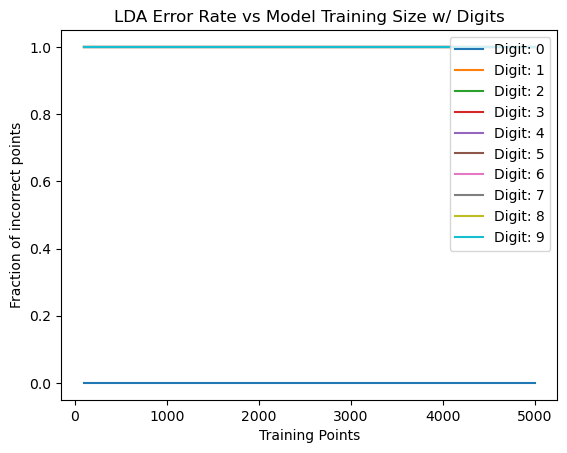

In [37]:
for i in range(10):
    plt.plot([100, 200, 500, 1000, 2000, 5000], np.array(error_rate2).T[i], label = "Digit: " + str(i))
plt.legend(loc="upper right")
plt.xlabel("Training Points")
plt.ylabel("Fraction of incorrect points")
plt.title("LDA Error Rate vs Model Training Size w/ Digits")

In [38]:
error_rate3 = []
for sample_pts in [100, 200, 500, 1000, 2000, 5000]:
    cov, mean, lmaoDontCare = create_parameters_qda(X_train, X_labels, sample_pts) 
    predictions = predict(mean, cov, y_train, "qda")
    err2 = []
    for i in range(10):
        error = 1 - sklearn.metrics.accuracy_score(predictions[y_labels == i], y_labels[y_labels == i])
        err2.append(error)
        print("Size: ", str(sample_pts), ". Error for digit", str(i), ": ", err2[i])
    error_rate3.append(np.array(err2))
    print('')

Size:  100 . Error for digit 0 :  0.0
Size:  100 . Error for digit 1 :  1.0
Size:  100 . Error for digit 2 :  1.0
Size:  100 . Error for digit 3 :  1.0
Size:  100 . Error for digit 4 :  1.0
Size:  100 . Error for digit 5 :  1.0
Size:  100 . Error for digit 6 :  1.0
Size:  100 . Error for digit 7 :  1.0
Size:  100 . Error for digit 8 :  1.0
Size:  100 . Error for digit 9 :  1.0

Size:  200 . Error for digit 0 :  0.0
Size:  200 . Error for digit 1 :  1.0
Size:  200 . Error for digit 2 :  1.0
Size:  200 . Error for digit 3 :  1.0
Size:  200 . Error for digit 4 :  1.0
Size:  200 . Error for digit 5 :  1.0
Size:  200 . Error for digit 6 :  1.0
Size:  200 . Error for digit 7 :  1.0
Size:  200 . Error for digit 8 :  1.0
Size:  200 . Error for digit 9 :  1.0

Size:  500 . Error for digit 0 :  0.0
Size:  500 . Error for digit 1 :  1.0
Size:  500 . Error for digit 2 :  1.0
Size:  500 . Error for digit 3 :  1.0
Size:  500 . Error for digit 4 :  1.0
Size:  500 . Error for digit 5 :  1.0
Size:  500

Text(0.5, 1.0, 'QDA Error Rate vs Model Training Size w/ Digits')

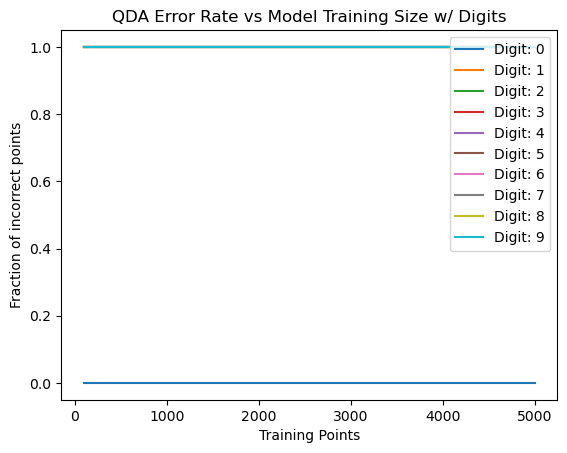

In [39]:
for i in range(10):
    plt.plot([100, 200, 500, 1000, 2000, 5000], np.array(error_rate3).T[i], label = "Digit: " + str(i))
plt.legend(loc="upper right")
plt.xlabel("Training Points")
plt.ylabel("Fraction of incorrect points")
plt.title("QDA Error Rate vs Model Training Size w/ Digits")

#### Problem 8.4: 
#### MNIST Score: 0.1

In [53]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

In [44]:
def train_models(data, labels, model_sizes):
    model = model_sizes.copy()
    for i, size in enumerate(model_sizes):
        training_data, training_labels = data_partition(data,
           labels, size)
        model[i] = svm.SVC()
        model[i].fit(training_data, training_labels)
    return model

In [57]:
import random 
def data_partition(data, labels, number):
    assert len(data) == len(labels)
    data, labels = list(data), list(labels)
    idx = range(len(data))
    random_idx = random.sample(idx, number)
    random_data = [data[i] for i in random_idx]
    random_label = [labels[i] for i in random_idx]
    return (random_data, random_label)
#MNIST
mnist_data_shuffled, mnist_labels_shuffled = data_partition(mnist_training_data,
                                                                   mnist_training_labels, 10000)
#SPAM
spam_data_shuffled, spam_labels_shuffled = data_partition(spam_training_data,
                                                                 spam_training_labels,
                                                                 int(len(spam_training_data)*.2))

In [58]:
mnist_test_data_flattened = mnist_test_data.reshape(mnist_test_data.shape[0], -1)
mnist_training_data_flattened = mnist_training_data.reshape(mnist_training_data.shape[0], -1)

mnist_model_kaggle = train_models(mnist_training_data_flattened, mnist_training_labels, [10000])[0]
y_test = mnist_model_kaggle.predict(mnist_test_data_flattened)

In [59]:
results_to_csv(y_test)

#### Problem 8.5
#### Spam Score: 0.803

In [50]:
spam_clf = SVC(kernel='linear', C=20)
spam_train_X, spam_train_y = data_partition(spam_training_data, spam_training_labels, 4171)

spam_clf.fit(spam_train_X, spam_train_y)

SVC(C=20, kernel='linear')

In [51]:
spam_train_y_array = np.array(spam_train_y)
train_score = spam_clf.score(spam_train_X, spam_train_y_array.ravel())
spam_y_test = spam_clf.predict(spam_test_data)


In [55]:
results_to_csv(spam_y_test)